# Home Renovation Analysis



Student Name: Michael Tsypin

Instructor Name: Morgan Jones

***

## Overview

The purpose of this project is to create a model that helps homeowners and real estate agencies highlight the key components to add profitability when selling their homes. Using multiple linear regression, we will analyze data from the King County House Sales dataset and examine how renovating different components of a home will impact overall sales.

## Business Problem

A real estate agency has asked for help regarding how they can increase profitability in selling their homes. Using data from the King County House Sales dataset, we will examine different components of the home, and how renovating them will change the overall price of the home. Due to fluctuations in the housing market, this information is useful for homeowners and real estate agencies in order to maximize their home sales profits.

## Data Understanding

### Importing

In [1]:
#Import libraries
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preparation

In [2]:
#Get initial housing dataframe
df = pd.read_csv("data/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
#Drop columns of "id","view","sqft_above","sqft_basement", yr_renovated","address","date", "lat", "long" as these do not contain pertinent data
df.drop(["id", "view", "sqft_above", "sqft_basement", "yr_renovated", "address", "date", "lat", "long"], axis=1, inplace=True)

In [4]:
#View dataframe
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,condition,grade,heat_source,sewer_system,sqft_garage,sqft_patio,yr_built
0,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,Good,7 Average,Gas,PUBLIC,0,40,1969
1,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,Average,7 Average,Oil,PUBLIC,0,240,1950
2,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,0,1956
3,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,Average,9 Better,Gas,PUBLIC,200,270,2010
4,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,Average,7 Average,Electricity,PUBLIC,550,30,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,1555000.0,5,2.0,1910,4000,1.5,NO,NO,NO,Good,8 Good,Oil,PUBLIC,0,210,1921
30151,1313000.0,3,2.0,2020,5800,2.0,NO,NO,NO,Average,7 Average,Gas,PUBLIC,0,520,2011
30152,800000.0,3,2.0,1620,3600,1.0,NO,NO,YES,Average,7 Average,Gas,PUBLIC,240,110,1995
30153,775000.0,3,2.5,2570,2889,2.0,NO,NO,NO,Average,8 Good,Gas,PUBLIC,480,100,2006


In [5]:
#Get info on columns and data size
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         30155 non-null  float64
 1   bedrooms      30155 non-null  int64  
 2   bathrooms     30155 non-null  float64
 3   sqft_living   30155 non-null  int64  
 4   sqft_lot      30155 non-null  int64  
 5   floors        30155 non-null  float64
 6   waterfront    30155 non-null  object 
 7   greenbelt     30155 non-null  object 
 8   nuisance      30155 non-null  object 
 9   condition     30155 non-null  object 
 10  grade         30155 non-null  object 
 11  heat_source   30123 non-null  object 
 12  sewer_system  30141 non-null  object 
 13  sqft_garage   30155 non-null  int64  
 14  sqft_patio    30155 non-null  int64  
 15  yr_built      30155 non-null  int64  
dtypes: float64(3), int64(6), object(7)
memory usage: 3.7+ MB


In [6]:
#Check for number of missing values in dataset
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
condition        0
grade            0
heat_source     32
sewer_system    14
sqft_garage      0
sqft_patio       0
yr_built         0
dtype: int64

In [7]:
#Drop columns with missing data
df.dropna(inplace=True)

In [8]:
#Get meaningful statistics on numerical columns
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
count,3.011100e+04,30111.000000,30111.000000,30111.000000,3.011100e+04,30111.000000,30111.000000,30111.000000,30111.000000
mean,1.108971e+06,3.415197,2.335708,2113.342798,1.664880e+04,1.543506,330.475308,217.451264,1975.162299
std,8.965158e+05,0.979755,0.888293,973.453260,5.993303e+04,0.567789,285.725020,245.301991,32.052930
min,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,0.000000,0.000000,1900.000000
25%,6.492360e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,0.000000,40.000000,1953.000000
50%,8.600000e+05,3.000000,2.500000,1920.000000,7.477000e+03,1.500000,400.000000,150.000000,1977.000000
75%,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,510.000000,320.000000,2003.000000
max,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,3580.000000,4370.000000,2022.000000


Looking at the price column statistics, the average price for a home in King County is about 1.1 million USD. The lowest price for a home in King County is about 27,360 USD and the highest price is about 30.8 million USD. 

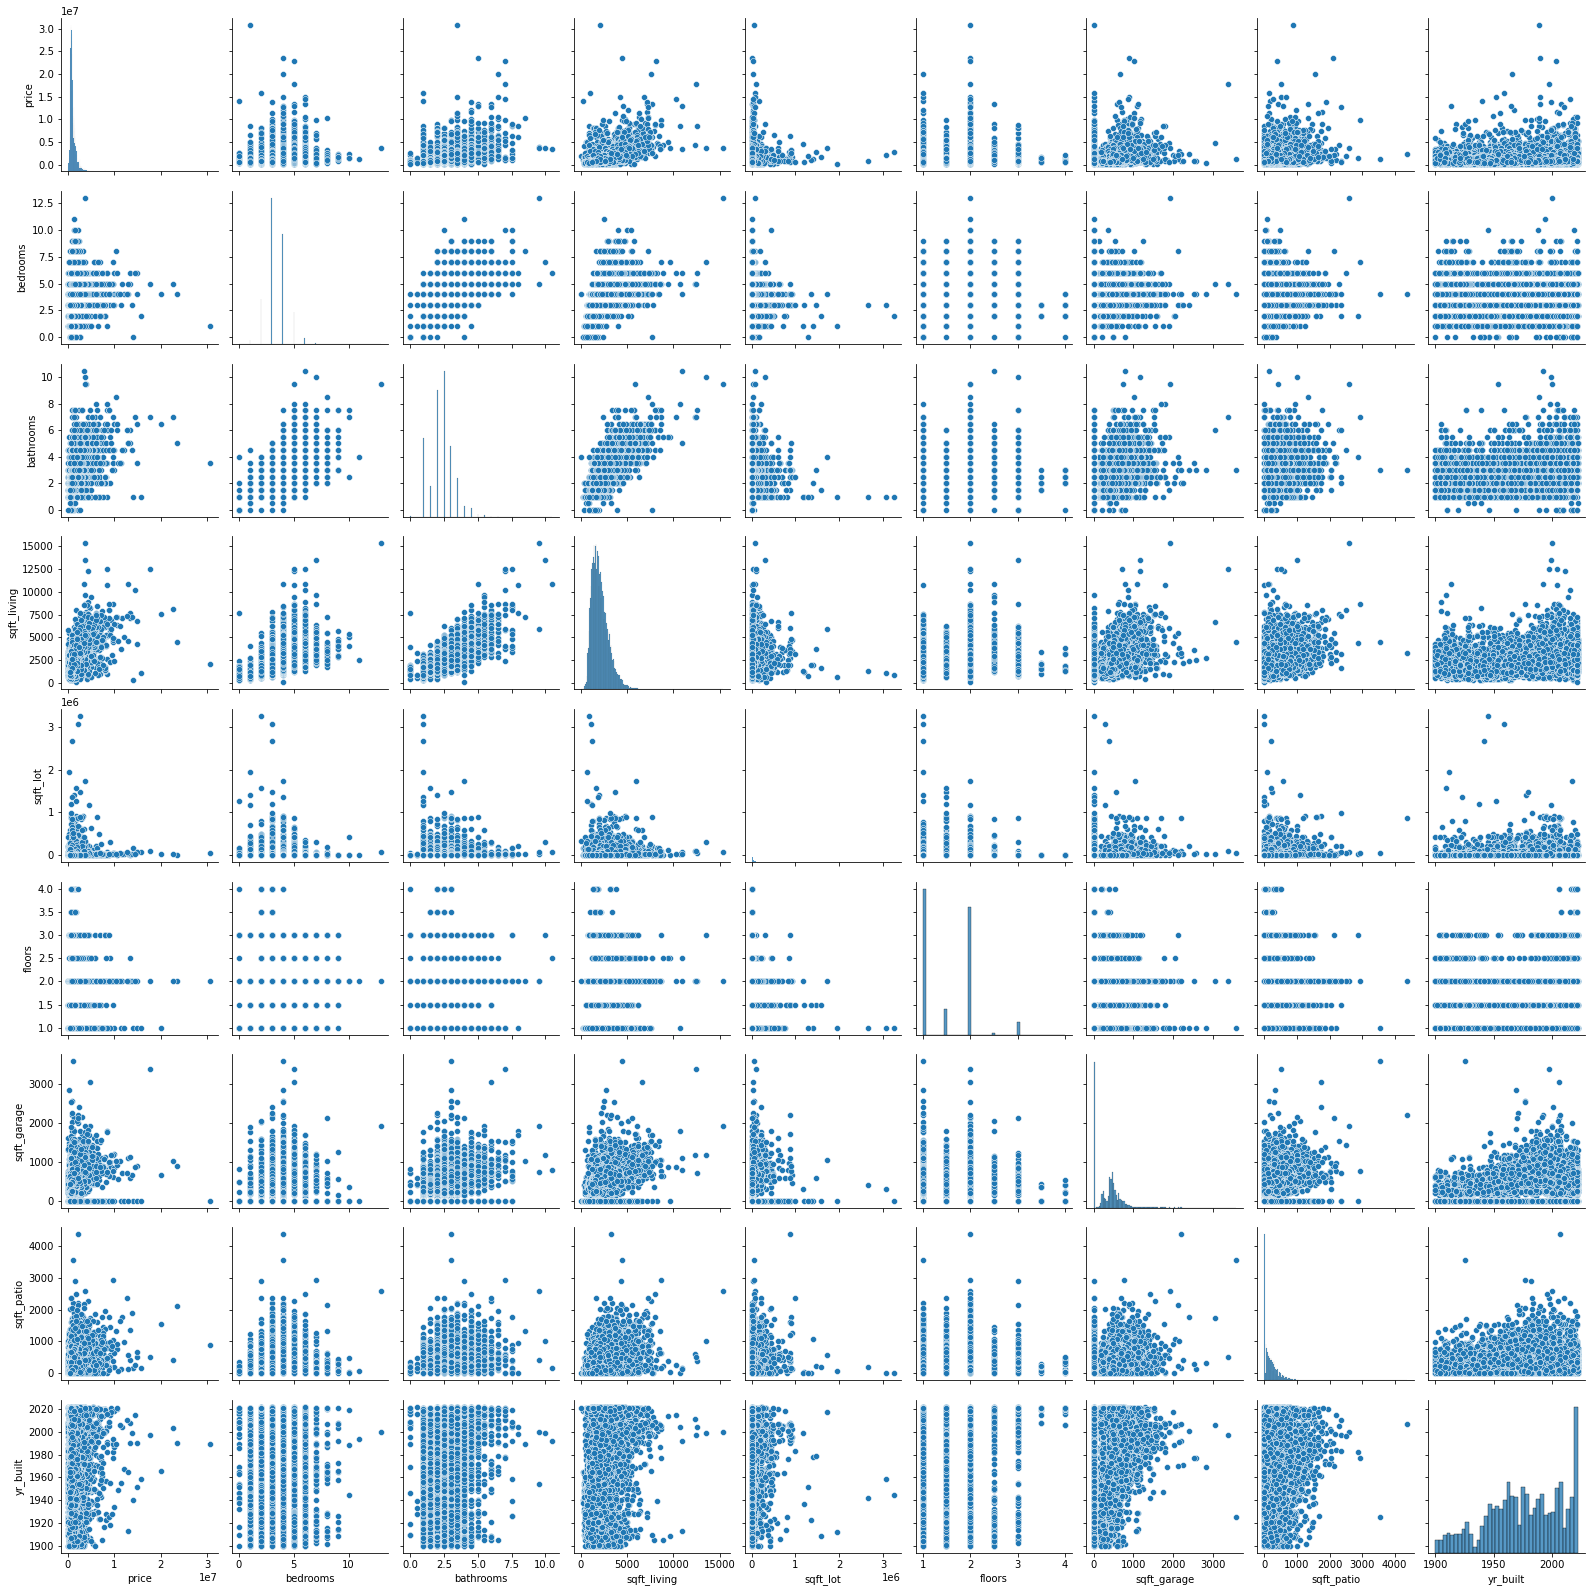

In [9]:
#Create pairplot
sns.pairplot(df);

We will focus on the top row of this pairplot to identify any linear relationships between the price column and any of the other numerical columns. The variable that appears to have the most linear relationship with price is the "sqft_living" column. The fourth graph from the top row shows a linear relationship between price and sqft_living.

In [10]:
#Create dataframe showing how each column correlates with each other
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
price,1.000000,0.288954,0.480337,0.608616,0.086550,0.180589,0.263674,0.313789,0.095796
bedrooms,0.288954,1.000000,0.588035,0.637048,0.006215,0.146871,0.318110,0.183660,0.145497
bathrooms,0.480337,0.588035,1.000000,0.772226,0.038028,0.404291,0.456264,0.327982,0.443379
sqft_living,0.608616,0.637048,0.772226,1.000000,0.122271,0.303911,0.510967,0.396530,0.291242
sqft_lot,0.086550,0.006215,0.038028,0.122271,1.000000,-0.031555,0.089318,0.154575,0.001897
floors,0.180589,0.146871,0.404291,0.303911,-0.031555,1.000000,0.132363,0.125016,0.544314
sqft_garage,0.263674,0.318110,0.456264,0.510967,0.089318,0.132363,1.000000,0.216512,0.447720
sqft_patio,0.313789,0.183660,0.327982,0.396530,0.154575,0.125016,0.216512,1.000000,0.138112
yr_built,0.095796,0.145497,0.443379,0.291242,0.001897,0.544314,0.447720,0.138112,1.000000


In [11]:
#Visualize what pairs of columns have a higher correlation .75 or more
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_garage,sqft_patio,yr_built
price,True,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False
floors,False,False,False,False,False,True,False,False,False
sqft_garage,False,False,False,False,False,False,True,False,False
sqft_patio,False,False,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,False,False,False,True


In [12]:
#Save absolute value of correlation matrix as a data frame
MC_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

#Zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
MC_df['pairs'] = list(zip(MC_df.level_0, MC_df.level_1))

#Set index to pairs
MC_df.set_index(['pairs'], inplace = True)

#Drop level columns
MC_df.drop(columns=['level_1', 'level_0'], inplace = True)

#Rename correlation column as cc rather than 0
MC_df.columns = ['cc']

#Drop duplicates
MC_df.drop_duplicates(inplace=True)

In [13]:
#Identify pairs of variables that exhibit collinearity
MC_df[(MC_df.cc>.75) & (MC_df.cc <1)]

,cc
pairs,
"(sqft_living, bathrooms)",0.772226


We have identified that the variables of "square foot of living area" and "bathrooms" have a high correlation with one another and we will want to avoid using these variables together in the following regressions. This will avoid any issues with our results by avoiding variables that exhibit collinearity.

### Baseline Linear Regression

In [14]:
#Find column with highest correlation with "price" column to make a baseline linear regression
df.corr()["price"]

price          1.000000
bedrooms       0.288954
bathrooms      0.480337
sqft_living    0.608616
sqft_lot       0.086550
floors         0.180589
sqft_garage    0.263674
sqft_patio     0.313789
yr_built       0.095796
Name: price, dtype: float64

In [15]:
#The "sqft_living" column has the highest correlation with "price"
most_correlated = "sqft_living"

In [16]:
#Remove outliers
removed_outliers = df[df["price"] <= 7000000]

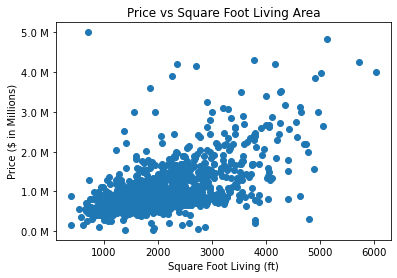

In [17]:
#Create scatter plot to demonstrate relationship between "sqft_living" and "price"
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

x = removed_outliers["sqft_living"].sample(1000, random_state=1)
y = removed_outliers["price"].sample(1000, random_state=1)

fig, ax = plt.subplots()

plt.scatter(x, y)
plt.title("Price vs Square Foot Living Area")
plt.xlabel("Square Foot Living (ft)")
plt.ylabel("Price ($ in Millions)")
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter(million_formatter)
plt.show();

In [18]:
#Set X and Y variables
y = removed_outliers["price"]
X_baseline = removed_outliers[["sqft_living"]]

In [19]:
#Create baseline model
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

In [20]:
#View results of baseline simple linear regression
baseline_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 2.214e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:22:45   Log-Likelihood:            -4.3945e+05
No. Observations:               30023   AIC:                         8.789e+05
Df Residuals:                   30021   BIC:                         8.789e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.648e+04   7716.142      4.728      0.000    2.14e+04    5.16e+04
sqft_living   497.1578      3.341    148.783      0.000     490.608     503.707
==============================================================================
Omnibus:                    15785.426   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241903.679
Skew:                           2.178   Prob(JB):                         0.00
Kurtosis:                      16.206   Cond. No.                     5.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R-squared

In [21]:
#Get R-squared value of baseline regression
baseline_results.rsquared

0.42441487256077537

R-squared explains the amount of variation (as a percentage) in the dependant variable by the model. The R-squared value of 0.42 in the baseline model can be interpreted as this model explains about 42% of the variance in price.

#### Prob (F-statistic)

In [22]:
#Get Prob(F-statistic) of baseline regression
baseline_results.f_pvalue

0.0

The Prob (F-statistic), also known as "p-value", lets us know if the model is statistically significant or not. The Prob (F-statistic) is compared to the value of alpha (0.05) and is considered statistically significant if the p-value is less than the alpha. In our baseline model, the p-value of 0.0 is less than 0.5, therefore, our model is statistically significant. 

#### Model Parameters

In [23]:
#Get coefficients for the variables of the baseline regression
baseline_results.params

const          36484.374112
sqft_living      497.157788
dtype: float64

The sqft_living coefficient value of 497 can be interpreted as for every increase in 1 square footage of living space in the home, we would expect an increase of about 497 USD in the price of that home.

#### Model Parameter P-values

In [24]:
#Get p-values for the variables of the baseline regression
baseline_results.pvalues

const          0.000002
sqft_living    0.000000
dtype: float64

As we did with the Prob (F-statistic), we compare the p-values of our intercept (const) and sqft_living coefficient to the alpha value of 0.05 to determine statistical significance. The const value of 0.000002 and the sqft_living value of 0 are both less than the alpha value of 0.05, meaning that both model parameters are statistically significant.

#### Model Parameter Confidence Intervals

In [25]:
#Get confidence intervals for the variables of the baseline regression
print(baseline_results.conf_int())

                        0             1
const        21360.404778  51608.343445
sqft_living    490.608309    503.707267


Our 95% confidence interval for the coefficient of price is about 491 USD to 504 USD.

#### Mean Absolute Error (MAE)

In [26]:
#Get Mean Absolute Error for baseline regression
baseline_mae = mean_absolute_error(y, baseline_results.predict(sm.add_constant(X_baseline)))
baseline_mae

367184.4942259043

The result of the baseline Mean Absolute Error demonstrates that on avergae, the model has an error of about 367184 USD when predicting the price of a home based on square footage of living space.

#### Residuals

In [27]:
#Get residuals for baseline regression
baseline_results.resid

0        5.186944e+04
1       -4.936114e+05
2       -1.157299e+06
3       -3.353452e+05
4       -8.010962e+02
             ...     
30150    5.689443e+05
30151    2.722569e+05
30152   -4.187999e+04
30153   -5.391799e+05
30154   -1.330737e+05
Length: 30023, dtype: float64

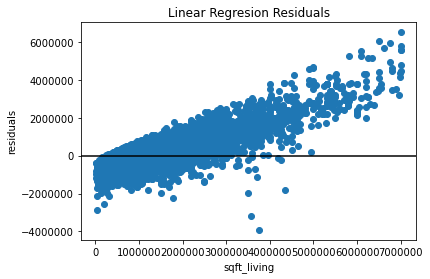

In [28]:
#Plot residuals for baseline regression
fig, ax = plt.subplots()

ax.scatter(removed_outliers["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_title("Linear Regresion Residuals")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals")
ax.ticklabel_format(style='plain');

### Multiple Linear Regression

In [29]:
#Find the values of the categorical columns and how often these values appear in the dataset
categoricals = removed_outliers.select_dtypes("object")

for col in categoricals:
    print(df[col].value_counts(), "\n")

NO     29600
YES      511
Name: waterfront, dtype: int64 

NO     29339
YES      772
Name: greenbelt, dtype: int64 

NO     24862
YES     5249
Name: nuisance, dtype: int64 

Average      18515
Good          8052
Very Good     3258
Fair           225
Poor            61
Name: condition, dtype: int64 

7 Average        11693
8 Good            9400
9 Better          3804
6 Low Average     2852
10 Very Good      1369
11 Excellent       406
5 Fair             385
12 Luxury          122
4 Low               46
13 Mansion          24
3 Poor               9
2 Substandard        1
Name: grade, dtype: int64 

Gas                  20576
Electricity           6460
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64 

PUBLIC                25767
PRIVATE                4336
PRIVATE RESTRICTED        5
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64 



In [30]:
#We will use the "condition" column as our categorical variable in the multiple linear regression
cat_col = "condition"

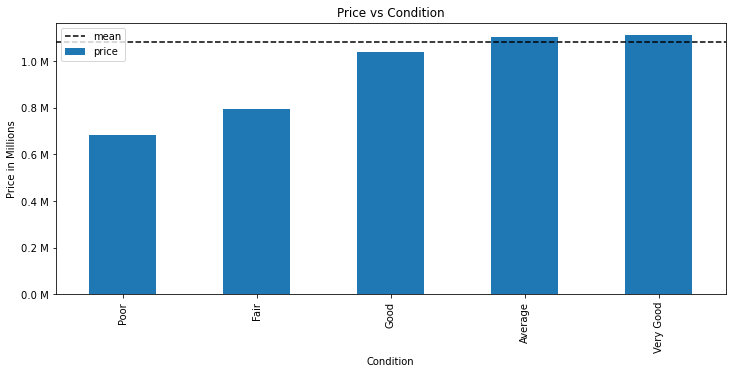

In [31]:
#Graph values of the "condition" column
fig, ax = plt.subplots(figsize=(12,5))
removed_outliers.groupby("condition").mean().sort_values(by="price").plot.bar(y="price", ax=ax)
ax.axhline(y=removed_outliers["price"].mean(), label="mean", color="black", linestyle="--")
ax.legend()
ax.set_title("Price vs Condition")
ax.set_xlabel("Condition")
ax.set_ylabel("Price in Millions")
ax.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(million_formatter);

In [32]:
#Prepare X variable of the iterated model
X_iterated = removed_outliers[[most_correlated, cat_col]]
X_iterated

,sqft_living,condition
0,1180,Good
1,2770,Average
2,2880,Average
3,2160,Average
4,1120,Average
...,...,...
30150,1910,Good
30151,2020,Average
30152,1620,Average
30153,2570,Average


In [33]:
#One-Hot encode categorical "condition" column
X_iterated = pd.get_dummies(X_iterated, columns=[cat_col])
X_iterated

,sqft_living,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,0,0,1,0,0
1,2770,1,0,0,0,0
2,2880,1,0,0,0,0
3,2160,1,0,0,0,0
4,1120,1,0,0,0,0
...,...,...,...,...,...,...
30150,1910,0,0,1,0,0
30151,2020,1,0,0,0,0
30152,1620,1,0,0,0,0
30153,2570,1,0,0,0,0


In [34]:
#Drop "condition_Poor" column of iterated X variable
X_iterated.drop("condition_Poor", axis=1, inplace=True)

In [35]:
#Create iterated model
iterated_model = sm.OLS(y, sm.add_constant(X_iterated))
iterated_results = iterated_model.fit()

In [36]:
#View results of iterated model
print(iterated_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.426
Method:                 Least Squares   F-statistic:                     4449.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:23:20   Log-Likelihood:            -4.3941e+05
No. Observations:               30023   AIC:                         8.788e+05
Df Residuals:                   30017   BIC:                         8.789e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 3.56e+04   7

This multiple regression model is slightly improved with an adjusted R-squared value of 42.6% and is statistically significant with a Prob (F-statistic) of zero which is less than the alpha value of 0.05. However, all the model parameters, except for the sqft_living coefficient, are not statistically significant as their p-values are greater than the alpha value of 0.05. We will have to make changes to our data and/or try to use different variables in our regression.

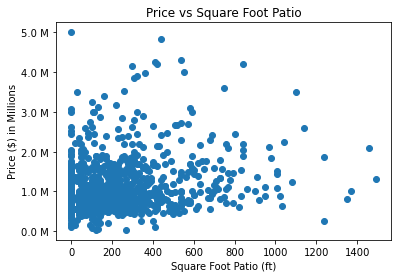

In [37]:
#Create scatter plot to demonstrate relationship between "sqft_patio" and "price"
x = removed_outliers["sqft_patio"].sample(1000, random_state=1)
y = removed_outliers["price"].sample(1000, random_state=1)

fig, ax = plt.subplots()

plt.scatter(x, y)
plt.title("Price vs Square Foot Patio")
plt.xlabel("Square Foot Patio (ft)")
plt.ylabel("Price ($) in Millions")
plt.ticklabel_format(style='plain')
ax.yaxis.set_major_formatter(million_formatter)
plt.show();

In [38]:
#Create new X variable by adding in "sqft_patio" column to baseline X variable
y = removed_outliers["price"]
X_2 = removed_outliers[["sqft_living", "sqft_patio"]]

In [39]:
#Create iterated model 2
model_2 = sm.OLS(y, sm.add_constant(X_2))
results_2 = model_2.fit()

In [40]:
#View results of iterated model 2
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                 1.124e+04
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:23:28   Log-Likelihood:            -4.3935e+05
No. Observations:               30023   AIC:                         8.787e+05
Df Residuals:                   30020   BIC:                         8.787e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.49e+04   7691.984      4.537      

In [41]:
#Get Mean Absolute Error for regression
mae = mean_absolute_error(y, results_2.predict(sm.add_constant(X_2)))
mae

365178.9779108286

Based on the results above, the model is statistically significant overall based on the value of the prob (F-statisitic) being less than the alpha value of 0.05. The model is slightly imporved with an adjusted R-squared value of .428, meaning that 42.8% of the variance in price can be explained by square footage of living space in the home and square footage of the patio. All of our variables are indeed statistically significant with p-values all less than alpha. The sqft_living coeficcient is about 478, meaning that for every increase of 1 square foot in living area we would expect the value of the home to increase by about 478 USD. The coefficient of sqft_patio is about 199, meaning that for every increase of 1 square foot of the patio, we would expect the value of the home to increase by about 199 USD.

In [42]:
#Create new X variable by combining "sqft_living," "sqft_patio," and "condition" columns
y = removed_outliers["price"]
X_3 = removed_outliers[["sqft_living", "sqft_patio", "condition"]]

In [43]:
#Prepare X variable iterated model 3
X_3 = pd.get_dummies(X_3, columns=["condition"])
X_3

,sqft_living,sqft_patio,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,40,0,0,1,0,0
1,2770,240,1,0,0,0,0
2,2880,0,1,0,0,0,0
3,2160,270,1,0,0,0,0
4,1120,30,1,0,0,0,0
...,...,...,...,...,...,...,...
30150,1910,210,0,0,1,0,0
30151,2020,520,1,0,0,0,0
30152,1620,110,1,0,0,0,0
30153,2570,100,1,0,0,0,0


In [44]:
#Drop "condition_Poor" of iterated model 3
X_3.drop("condition_Poor", axis=1, inplace=True)

In [45]:
#Create iterated model 3
model_3 = sm.OLS(y, sm.add_constant(X_3))
results_3 = model_3.fit()

In [46]:
#View results of iterated model 3
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     3761.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:23:40   Log-Likelihood:            -4.3932e+05
No. Observations:               30023   AIC:                         8.787e+05
Df Residuals:                   30016   BIC:                         8.787e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.126e+04   7

Once again, we see that the constant variable and all condition variables are not statistically significant as their p-values are well above the alpha value of 0.05. Let us see if we can modify our data to make the condition variable work. This will be done by way of a log transformation.

In [47]:
#Log transform dataset
non_normal = ['price']

for feat in non_normal:
    removed_outliers[feat] = removed_outliers[feat].map(lambda x: np.log(x))

<ipython-input-47-6256fbbdd17a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  removed_outliers[feat] = removed_outliers[feat].map(lambda x: np.log(x))


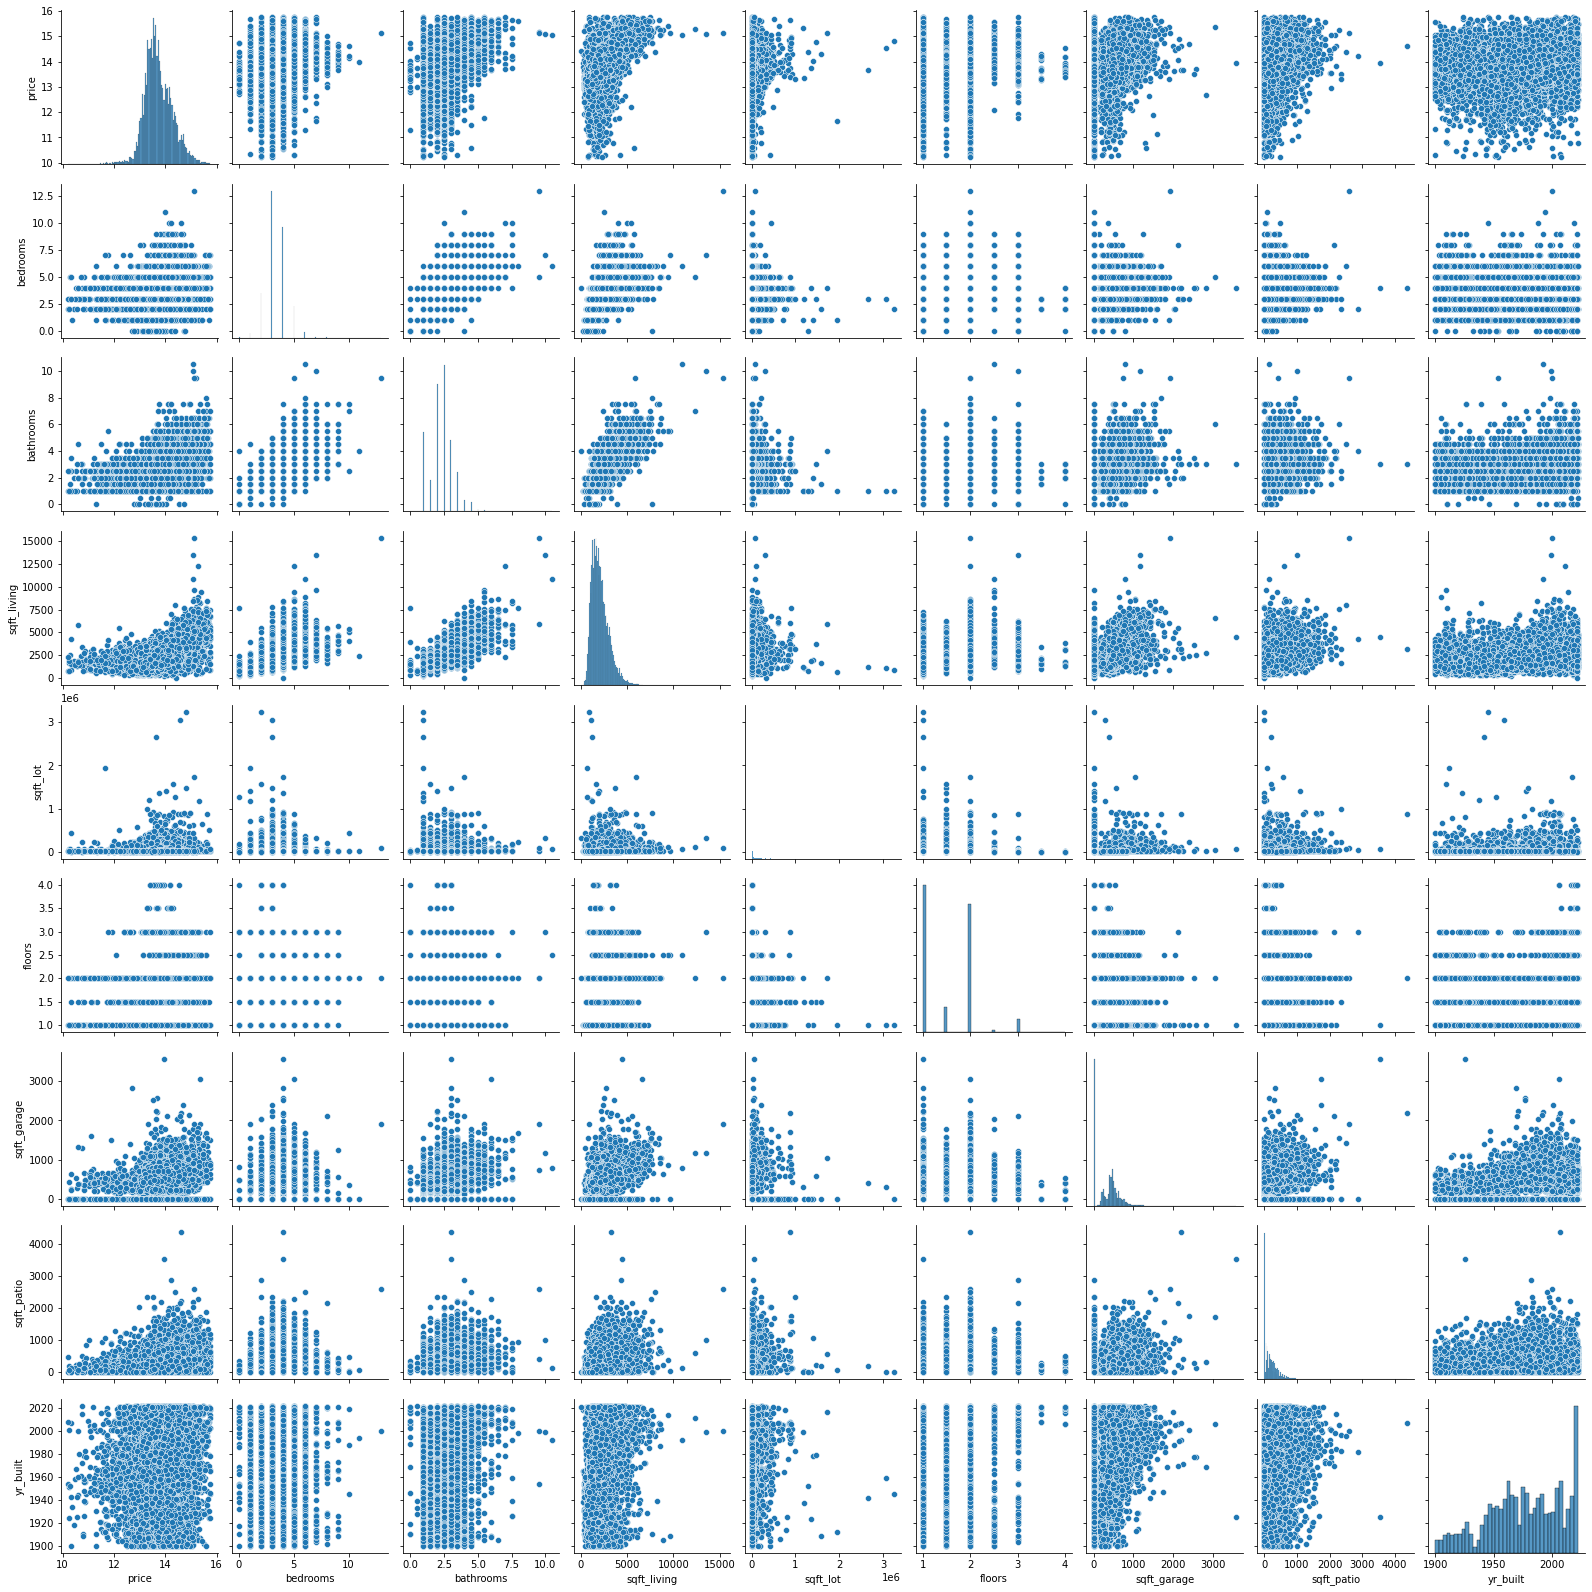

In [48]:
#Create pair plot
sns.pairplot(removed_outliers);

In [49]:
#Create new X and Y variables for log model
y = removed_outliers["price"]
X_log = removed_outliers[["sqft_living", "sqft_patio", "condition"]]

In [50]:
#Prepare X variable for log model
X_log = pd.get_dummies(X_log, columns=["condition"])
X_log

,sqft_living,sqft_patio,condition_Average,condition_Fair,condition_Good,condition_Poor,condition_Very Good
0,1180,40,0,0,1,0,0
1,2770,240,1,0,0,0,0
2,2880,0,1,0,0,0,0
3,2160,270,1,0,0,0,0
4,1120,30,1,0,0,0,0
...,...,...,...,...,...,...,...
30150,1910,210,0,0,1,0,0
30151,2020,520,1,0,0,0,0
30152,1620,110,1,0,0,0,0
30153,2570,100,1,0,0,0,0


In [51]:
#Drop "condition_Poor"
X_log.drop("condition_Poor", axis=1, inplace=True)

In [52]:
#Create Log model
model_log = sm.OLS(y, sm.add_constant(X_log))
results_log = model_log.fit()

In [53]:
#View results of log model
print(results_log.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     3123.
Date:                Thu, 25 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:24:33   Log-Likelihood:                -18377.
No. Observations:               30023   AIC:                         3.677e+04
Df Residuals:                   30016   BIC:                         3.683e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.6961    

Our new model has improved with a higher adjusted R-squared value of 0.384. The model is overall statistically significant with a Prob (F-statistic) value of 0, which is lower than the alpha value of 0.05. All of our coefficients are statistically significant as well as they all have p-values of 0 which are less than the alpha value of 0.5. For every 1% increase in square footage of the living area, we would expect an associated increase of 0.0004% in price. For every 1% increase in square footage of the patio, we would expect an associated increase of 0.0002% in price. For a house of Fair condition compared to a house of poor condition, we see an associated increase in price of about 16%. For a house of Average condition compared to a house of poor condition, we see an associated increase in price of about 25%. For a house of good condition compared to a house of poor condition, we see an associated increase in price of about 26%. For a house of very good condition compared to a house of poor condition, we see an associated increase in price of about 32%. 

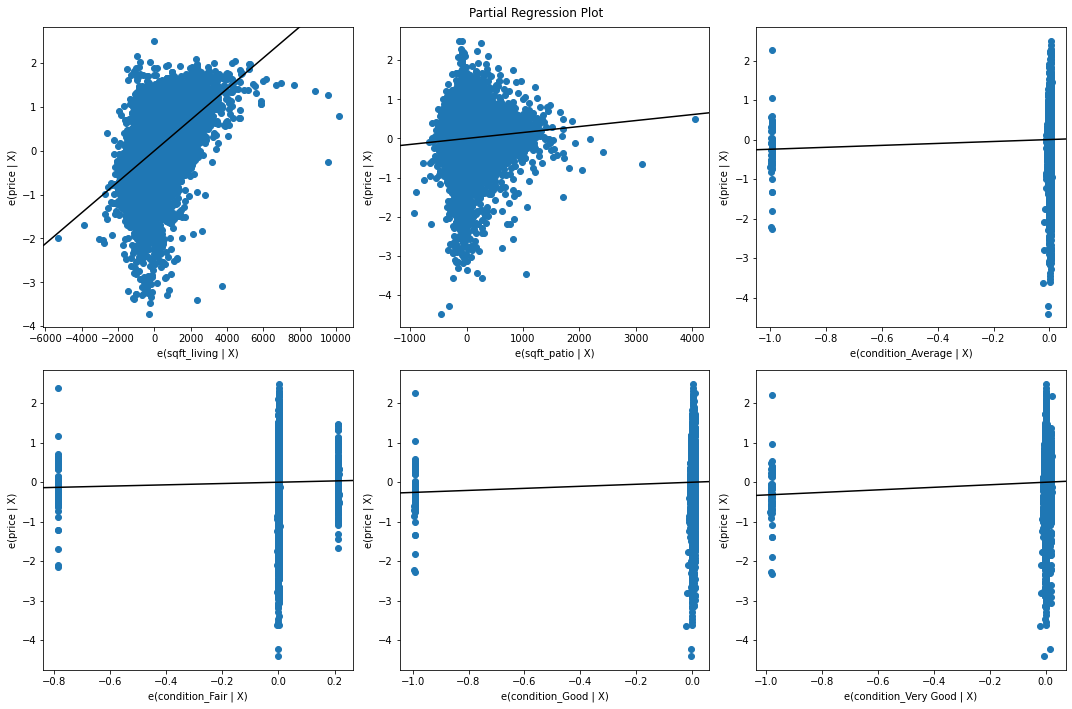

In [54]:
#Plot residuals of log model
fig = plt.figure(figsize=(15,10))
sm.graphics.plot_partregress_grid(
    results_log,
    exog_idx=list(X_log.columns),
    grid=(2,3),
    fig=fig)
plt.tight_layout()
plt.show();

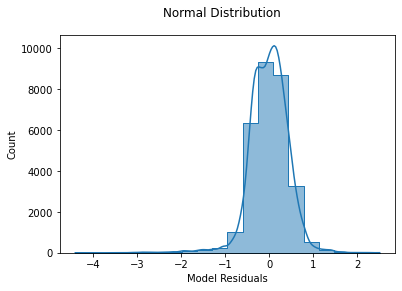

In [55]:
#Check normality
fig, ax = plt.subplots()
sns.histplot(results_log.resid, bins=20, element="step", kde=True, ax=ax)
ax.set_xlabel("Model Residuals")
fig.suptitle("Normal Distribution");

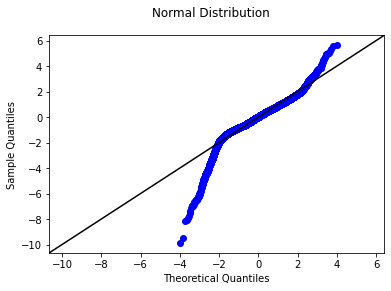

In [56]:
#Run Q-Q plot
fig, ax = plt.subplots()
sm.graphics.qqplot(results_log.resid, dist=stats.norm, line='45', fit=True, ax=ax)

line = ax.lines[1]
line.set_color("black")
fig.suptitle("Normal Distribution");

In [57]:
#Import Breush-Pagan Test
from statsmodels.stats.diagnostic import het_breuschpagan

In [58]:
#Run Breush-Pagan Test
het_breuschpagan(results_log.resid, sm.add_constant(X_log))

(129.2422150204898,
 1.8559554748382925e-25,
 21.628452523758746,
 1.6382264900709635e-25)

The Breush-Pagan Test outputs four numbers, 1-Lagrange multiplier statistic, 2-Lagrange multiplier p-value, 3-Breusch-Pagan test statistic, 4-Breusch-Pagan test p-value. With the p-values being lower than the alpha value of 0.05, we fail to reject the null hypothesis of homoscedasticity.

## Conclusion

Based on the results of this project,  real estate agencies and homeowners should improve the overall condition of the house to add the most value when selling a home. For example, ensuring all maintenance is up to par and the exterior is in good condition. real estate agencies and homeowners should also add square footage to the patio and living area to help increase the value of the home.  